# SEGMENT2 EIGEN DECOMPOSITION

# AFFINE TRANSFORMATIONS

In [1]:
import numpy as np
import matplotlib.pyplot as plt
v=np.array([3,1])
v

array([3, 1])

In [2]:
def plot_vectors(vectors,colors):
    plt.figure()
    plt.axvline(x=0,color='lightgray')
    plt.axhline(y=0,color='lightgray')
    for i in range(len(vectors)):
        x=np.concatenate([[0,0],vectors[i]])
        plt.quiver([x[0]],[x[1]],[x[2]],[x[3]],angles='xy',scale_units='xy',scale=1,color=colors[i])

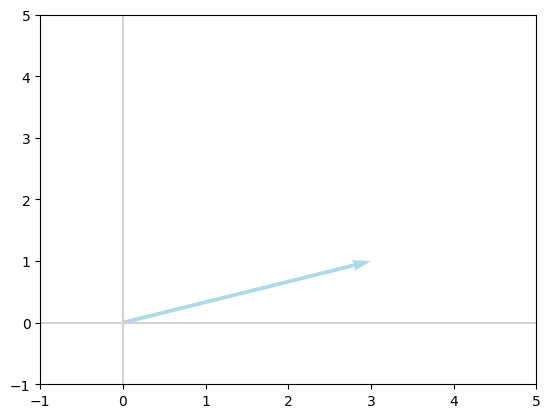

In [3]:
plot_vectors([v],['lightblue'])
plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.show()


In [4]:
i=np.array([[1,0],[0,1]])
i
iv=np.dot(i,v)
iv

array([3, 1])

In [5]:
v==iv

array([ True,  True])

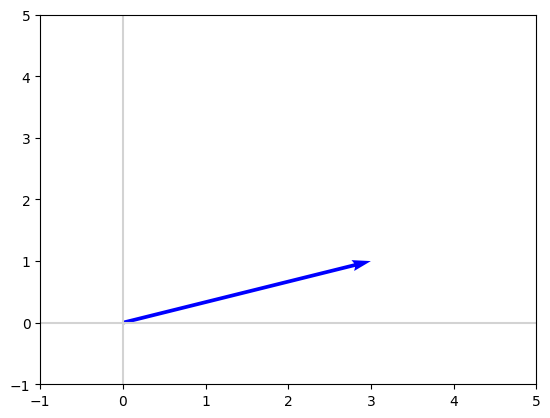

In [6]:
plot_vectors([iv],['blue'])
plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.show()

In [7]:
f=np.array([[-1,0],[0,1]])
f
fv=np.dot(f,v)
fv

array([-3,  1])

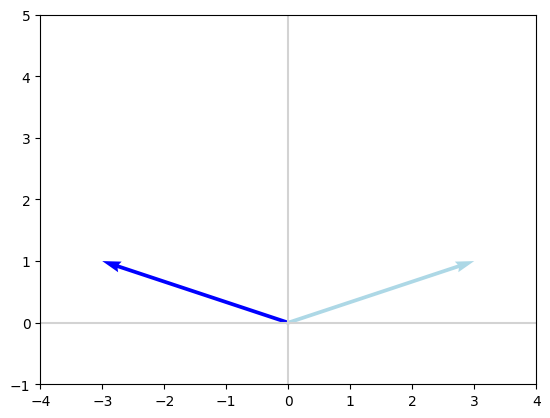

In [8]:
plot_vectors([v,fv],['lightblue','blue'])
plt.ylim(-1,5)
plt.xlim(-4,4)
plt.show()

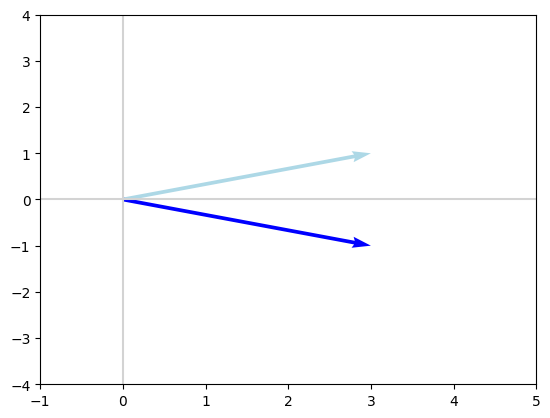

In [9]:
v=np.array([3,1])
v
e=np.array([[1,0],[0,-1]])
e
ev=np.dot(e,v)
ev
plot_vectors([v,ev],['lightblue','blue'])
plt.xlim(-1,5)
plt.ylim(-4,4)
plt.show()

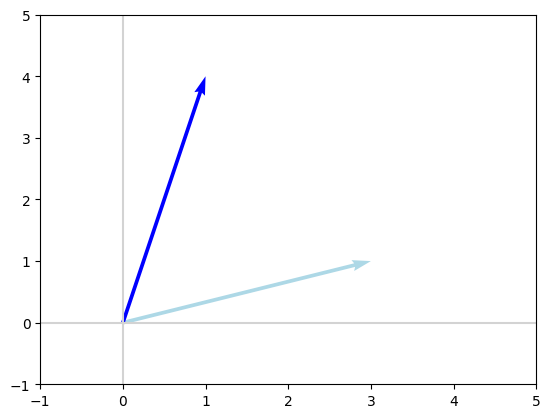

In [10]:
a=np.array([[-1,4],[2,-2]])
a
av=np.dot(a,v)
av
plot_vectors([v,av],['lightblue','blue'])
plt.xlim(-1,5)
plt.ylim(-1,5)
plt.show()

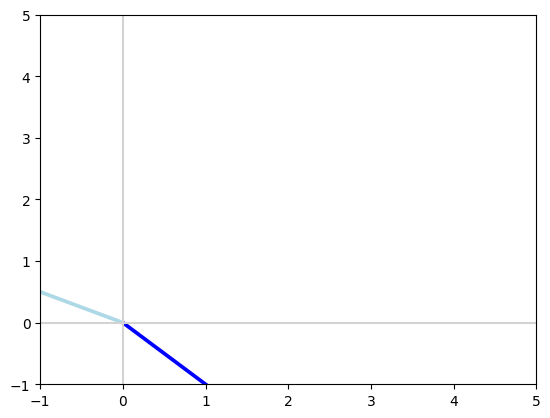

In [11]:
v2=np.array([-2,1])
b=np.dot(a,v2)
b
plot_vectors([v2,np.dot(a,v2)],['lightblue','blue'])
plt.xlim(-1,5)
plt.ylim(-1,5)
plt.show()

In [12]:
np.matrix(v).T

matrix([[3],
        [1]])

In [13]:
v

array([3, 1])

In [14]:
v3=np.array([-3,-1])
v4=np.array([-1,1])
V=np.concatenate((np.matrix(v).T,np.matrix(v2).T,
                  np.matrix(v3).T,np.matrix(v4).T),axis=1)
V

matrix([[ 3, -2, -3, -1],
        [ 1,  1, -1,  1]])

In [15]:
iv=np.dot(i,V)
iv

matrix([[ 3, -2, -3, -1],
        [ 1,  1, -1,  1]])

In [16]:
av=np.dot(i,V)
av

matrix([[ 3, -2, -3, -1],
        [ 1,  1, -1,  1]])

In [17]:
def vectorify(mtrx,clmn):
    return np.array(mtrx[:,clmn]).reshape(-1)

In [18]:
V

matrix([[ 3, -2, -3, -1],
        [ 1,  1, -1,  1]])

In [19]:
vectorify(V,0)

array([3, 1])

In [20]:
vectorify(V,0)==v

array([ True,  True])

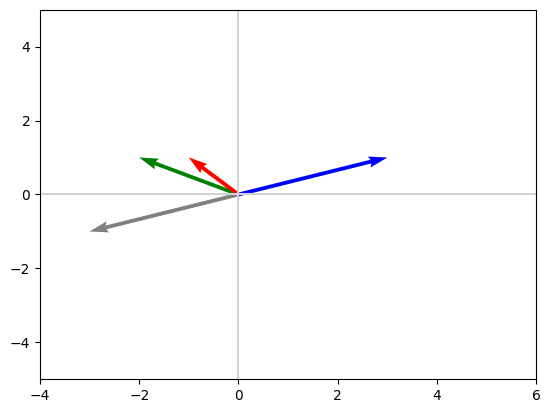

In [21]:
plot_vectors([vectorify(V,0),vectorify(V,1),vectorify(V,2),vectorify(V,3),vectorify(av,0),vectorify(av,1),vectorify(av,2),vectorify(av,3)]
              ,['lightblue','lightgreen','lightgray','orange','blue','green','gray','red'])
plt.xlim(-4,6)
_=plt.ylim(-5,5)

# eigen values and eigen vectors

In [22]:
A=np.array([[-1,4],[2,-2]])
lamdbas,v=np.linalg.eig(A)
v

array([[ 0.86011126, -0.76454754],
       [ 0.51010647,  0.64456735]])

In [23]:
lamdbas

array([ 1.37228132, -4.37228132])

In [24]:
v1=v[:,0]
v1

array([0.86011126, 0.51010647])

In [25]:
lambduh=lamdbas[0]
lambduh

np.float64(1.3722813232690143)

In [26]:
av1=np.dot(a,v1)
av1

array([1.18031462, 0.70000958])

In [27]:
lambduh*v1

array([1.18031462, 0.70000958])

(-1.0, 2.0)

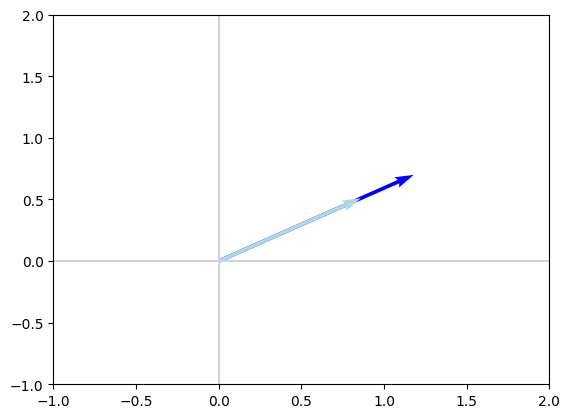

In [28]:
plot_vectors([av1,v1],['blue','lightblue'])
plt.xlim(-1,2)
plt.ylim(-1,2)

In [29]:
v2=v[:,1]
v2

array([-0.76454754,  0.64456735])

In [30]:
lambda2=lamdbas[1]
lambda2

np.float64(-4.372281323269014)

In [31]:
av2=np.dot(a,v2)
av2

array([ 3.34281692, -2.81822977])

In [32]:
lambda2*v2

array([ 3.34281692, -2.81822977])

(-3.0, 2.0)

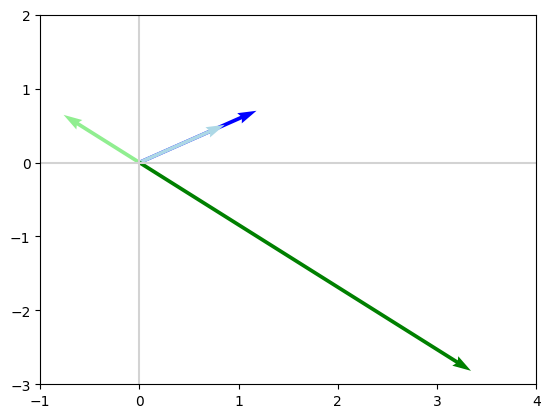

In [33]:
plot_vectors([av1,v1,av2,v2],['blue','lightblue','green','lightgreen'])
plt.xlim(-1,4)
plt.ylim(-3,2)

# using pytorch eig()

In [34]:
A=np.array([[-1,4],[2,-2]])
A

array([[-1,  4],
       [ 2, -2]])

In [35]:
import torch
A_P = torch.tensor([[-1, 4], [2, -2.]], dtype=torch.float32)
A_P

tensor([[-1.,  4.],
        [ 2., -2.]])

In [36]:
eigenvalues, eigenvectors = torch.linalg.eig(A_P)
eigenvalues = eigenvalues.real.float()
eigenvectors = eigenvectors.real.float()
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:", eigenvectors)


Eigenvalues: tensor([ 1.3723, -4.3723])
Eigenvectors: tensor([[ 0.8601, -0.7645],
        [ 0.5101,  0.6446]])


In [37]:
V_P=eigenvectors[:,0]
V_P

tensor([0.8601, 0.5101])

In [38]:
lambda_p=eigenvalues[0]
lambda_p

tensor(1.3723)

In [39]:
AV_P=torch.matmul(A_P,V_P)
AV_P

tensor([1.1803, 0.7000])

In [40]:
lambda_p* V_P

tensor([1.1803, 0.7000])

In [41]:
V2_P=eigenvectors[:,1]
V2_P

tensor([-0.7645,  0.6446])

In [42]:
lambda2_p=eigenvalues[1]
lambda2_p

tensor(-4.3723)

In [43]:
AV2_P=torch.matmul(A_P,V2_P)
AV2_P

tensor([ 3.3428, -2.8182])

In [44]:
lambda2_p*V2_P

tensor([ 3.3428, -2.8182])

(-3.0, 2.0)

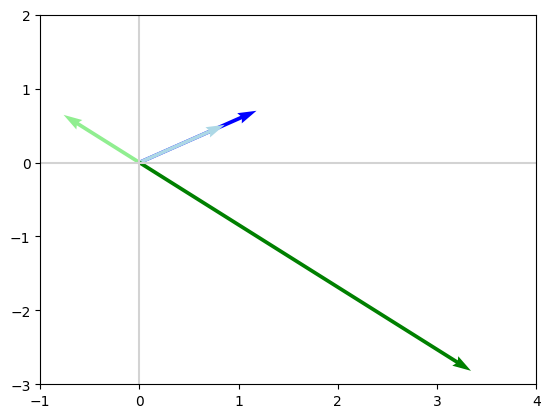

In [45]:
plot_vectors([AV_P.numpy(),V_P.numpy(),AV2_P.numpy(),V2_P.numpy()],['blue','lightblue','green','lightgreen'])
plt.xlim(-1,4)
plt.ylim(-3,2)

In [46]:
x=np.array([[25,2,9],[5,26,-5],[3,7,-1]])
x

array([[25,  2,  9],
       [ 5, 26, -5],
       [ 3,  7, -1]])

In [47]:
lambdas_x,v_x=np.linalg.eig(x)
v_x

array([[-0.71175736, -0.6501921 , -0.34220476],
       [-0.66652125,  0.74464056,  0.23789717],
       [-0.22170001,  0.15086635,  0.90901091]])

In [48]:
lambdas_x

array([29.67623202, 20.62117365, -0.29740567])

In [49]:
v_x=v_x[:,0]
v_x

array([-0.71175736, -0.66652125, -0.22170001])

In [50]:
lambdas_x=lambdas_x[0]
lambdas_x

np.float64(29.676232023948902)

In [51]:
np.dot(x,v_x)

array([-21.12227645, -19.77983919,  -6.5792208 ])

In [52]:
lambdas_x*v_x

array([-21.12227645, -19.77983919,  -6.5792208 ])

# matrix determinants

In [53]:
x=np.array([[4,2],[-5,-3]])
x

array([[ 4,  2],
       [-5, -3]])

In [54]:
np.linalg.det(x)

np.float64(-2.0000000000000013)

In [55]:
N=np.array([[-4,1],[-8,2]])
N

array([[-4,  1],
       [-8,  2]])

In [56]:
np.linalg.det(N)

np.float64(0.0)

In [57]:
# Ninv=np.linalg.inv(N)
# Ninv

# using pytorch

In [58]:
N=torch.tensor([[-4,1],[-8,2.]])
# torch.det(N)
N

tensor([[-4.,  1.],
        [-8.,  2.]])

In [59]:
x=np.array([[1,2,4],[2,-1,3],[0,5,1]])
x
np.linalg.det(x)

np.float64(19.999999999999996)

# determinants and eigenvalues

In [65]:
lambdas,v=np.linalg.eig(x)
lambdas

array([-3.25599251, -1.13863631,  5.39462882])

In [67]:
np.abs(np.linalg.det(x))

np.float64(19.999999999999996)

In [68]:
B=np.array([[1,0],[0,1]])
B

array([[1, 0],
       [0, 1]])

(-1.0, 3.0)

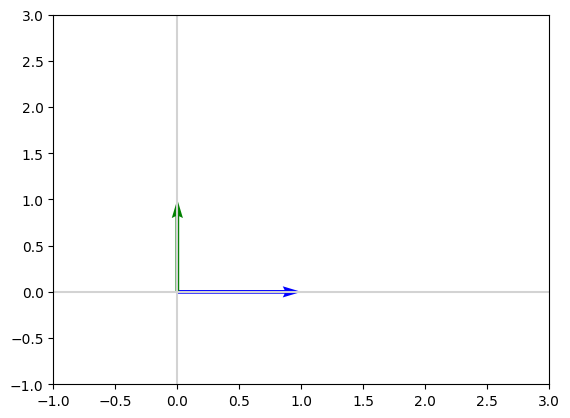

In [69]:
plot_vectors([vectorify(B,0),vectorify(B,1)],['blue','green'])
plt.xlim(-1,3)
plt.ylim(-1,3)

In [70]:
N

tensor([[-4.,  1.],
        [-8.,  2.]])

In [71]:
np.linalg.det(N)

np.float32(0.0)

In [72]:
NB=np.dot(N,B)
NB

C:\Users\valle\AppData\Local\Temp\ipykernel_7528\78066434.py:1: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  NB=np.dot(N,B)


array([[-4.,  1.],
       [-8.,  2.]])

(-9.0, 3.0)

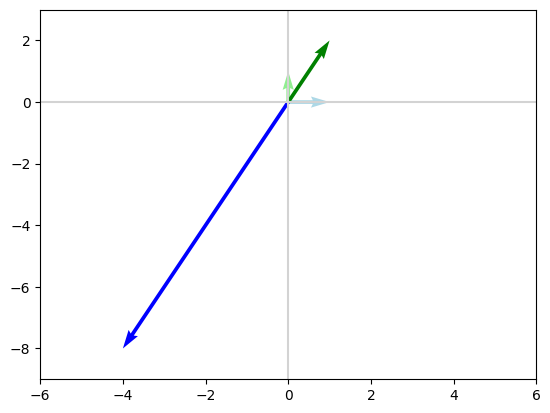

In [73]:
plot_vectors([vectorify(B,0),vectorify(B,1),vectorify(NB,0),vectorify(NB,1)],['lightblue','lightgreen','blue','green'])
plt.xlim(-6,6)
plt.ylim(-9,3)

In [74]:
i

array([[1, 0],
       [0, 1]])

In [75]:
np.linalg.det(i)

np.float64(1.0)

In [76]:
iB=np.dot(i,B)
iB

array([[1, 0],
       [0, 1]])

(-1.0, 3.0)

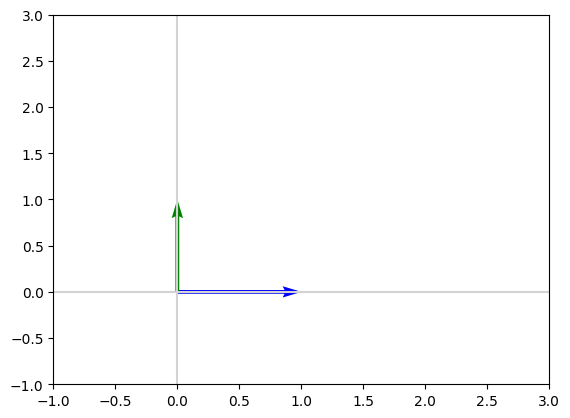

In [77]:
plot_vectors([vectorify(B,0),vectorify(B,1),vectorify(iB,0),vectorify(iB,1)],['lightblue','lightgreen','blue','green'])
plt.xlim(-1,3)
plt.ylim(-1,3)

In [78]:
lambdas,v=np.linalg.eig(i)
lambdas

array([1., 1.])

In [79]:
j=np.array([[-0.5,0],[0,2]])
j

array([[-0.5,  0. ],
       [ 0. ,  2. ]])

In [80]:
np.linalg.det(j)

np.float64(-1.0)

In [81]:
np.abs(np.linalg.det(j))

np.float64(1.0)

In [82]:
JB=np.dot(j,B)
JB

array([[-0.5,  0. ],
       [ 0. ,  2. ]])

(-1.0, 3.0)

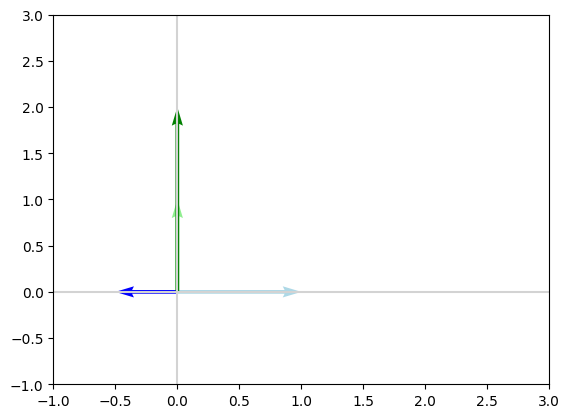

In [83]:
plot_vectors([vectorify(B,0),vectorify(B,1),vectorify(JB,0),vectorify(JB,1)],['lightblue','lightgreen','blue','green'])
plt.xlim(-1,3)
plt.ylim(-1,3)

In [84]:
D=i*2
D

array([[2, 0],
       [0, 2]])

In [85]:
np.linalg.det(D)

np.float64(4.0)

In [86]:
DB=np.dot(D,B)
DB

array([[2, 0],
       [0, 2]])

(-1.0, 3.0)

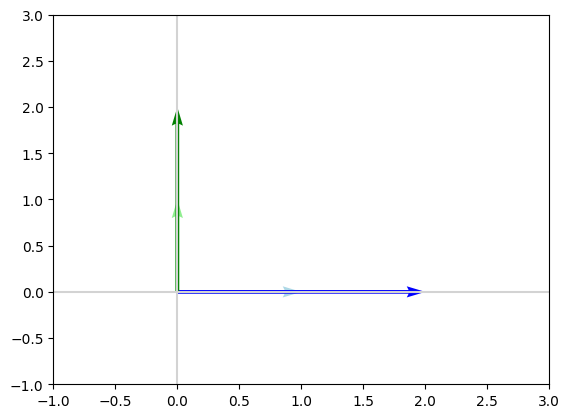

In [87]:
plot_vectors([vectorify(B,0),vectorify(B,1),vectorify(DB,0),vectorify(DB,1)],['lightblue','lightgreen','blue','green'])
plt.xlim(-1,3)
plt.ylim(-1,3)

# eigendecomposition

In [88]:
A=np.array([[4,2],[-5,-3]])
A

array([[ 4,  2],
       [-5, -3]])

In [89]:
lambdas,v=np.linalg.eig(A)
v

array([[ 0.70710678, -0.37139068],
       [-0.70710678,  0.92847669]])

In [90]:
Vinv=np.linalg.inv(v)
Vinv

array([[2.3570226 , 0.94280904],
       [1.79505494, 1.79505494]])

In [91]:
lambdas=np.diag(lambdas)
lambdas

array([[ 2.,  0.],
       [ 0., -1.]])

In [92]:
np.dot(v,np.dot(lambdas,Vinv))
# A=VDV^T....D measns diagonals of egienvalues

array([[ 4.,  2.],
       [-5., -3.]])

In [93]:
A=np.array([[2,1],[1,2]])
A

array([[2, 1],
       [1, 2]])

In [94]:
lambdas,Q=np.linalg.eig(A)
lambdas

array([3., 1.])

In [95]:
Lambda=np.diag(lambdas)
Lambda

array([[3., 0.],
       [0., 1.]])

In [96]:
Q

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [97]:
np.dot(Q,np.dot(Lambda,Q.T))
# A=QDQ^T  .D measns diagonals of egienvalues

array([[2., 1.],
       [1., 2.]])

In [98]:
np.dot(Q.T,Q)

array([[1.00000000e+00, 2.23711432e-17],
       [2.23711432e-17, 1.00000000e+00]])

In [99]:
np.dot(Q,Q.T)

array([[ 1.00000000e+00, -2.23711432e-17],
       [-2.23711432e-17,  1.00000000e+00]])

# segment3  matrix operation for ml

In [100]:
A=np.array([[-1,2],[3,-2],[5,7]])
A

array([[-1,  2],
       [ 3, -2],
       [ 5,  7]])

In [101]:
U,d,VT=np.linalg.svd(A)
U

array([[ 0.12708324,  0.47409506,  0.87125411],
       [ 0.00164602, -0.87847553,  0.47778451],
       [ 0.99189069, -0.0592843 , -0.11241989]])

In [102]:
VT

array([[ 0.55798885,  0.82984845],
       [-0.82984845,  0.55798885]])

In [103]:
d

array([8.66918448, 4.10429538])

In [104]:
np.diag(d)

array([[8.66918448, 0.        ],
       [0.        , 4.10429538]])

In [105]:
D=np.concatenate((np.diag(d),[[0,0]]),axis=0)
D

array([[8.66918448, 0.        ],
       [0.        , 4.10429538],
       [0.        , 0.        ]])

In [106]:
np.dot(U,np.dot(D,VT))
# A=UDV^T   .D measns diagonals of egienvalues

array([[-1.,  2.],
       [ 3., -2.],
       [ 5.,  7.]])

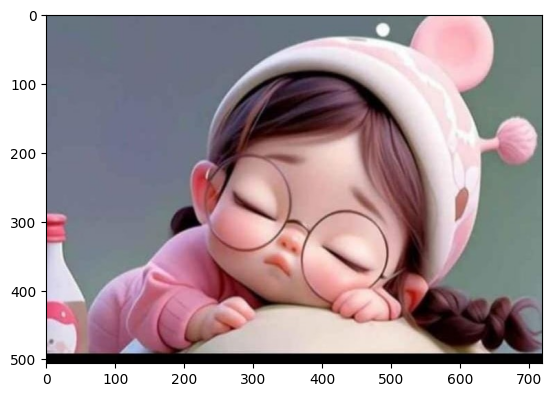

In [109]:
from PIL import Image
img=Image.open('titu.jpg')
plt.imshow(img)

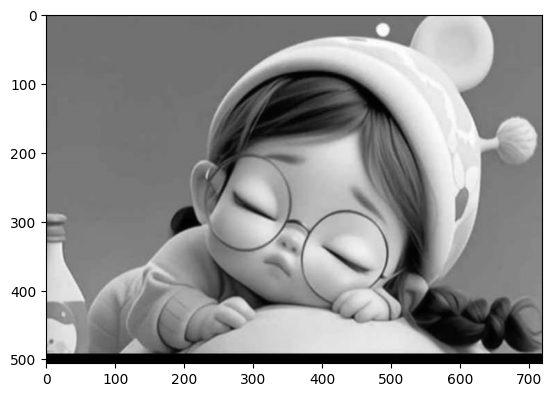

In [114]:
imggray = img.convert('LA')
_ = plt.imshow(imggray)

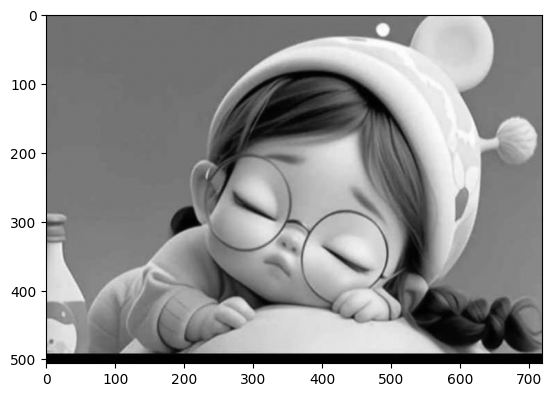

In [115]:
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
_ = plt.imshow(imgmat, cmap='gray')

In [116]:
U, sigma, V = np.linalg.svd(imgmat)

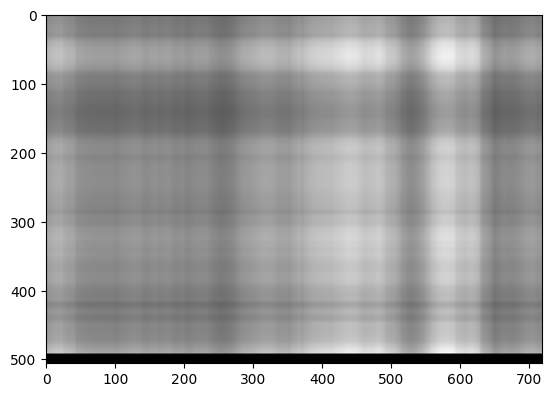

In [117]:
reconstimg = np.matrix(U[:, :1]) * np.diag(sigma[:1]) * np.matrix(V[:1, :])
_ = plt.imshow(reconstimg, cmap='gray')

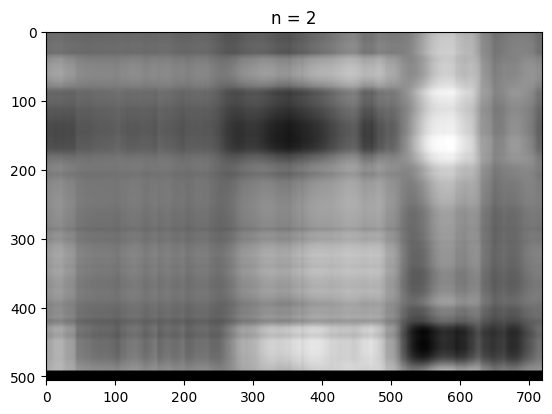

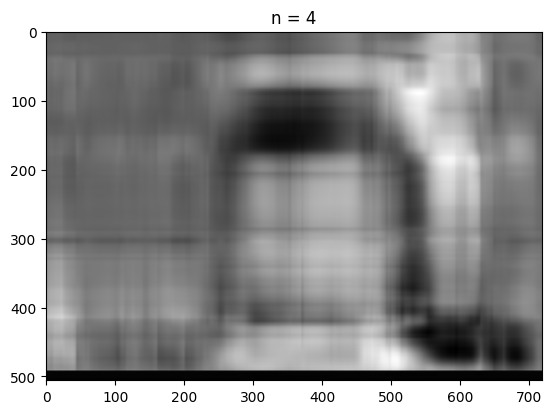

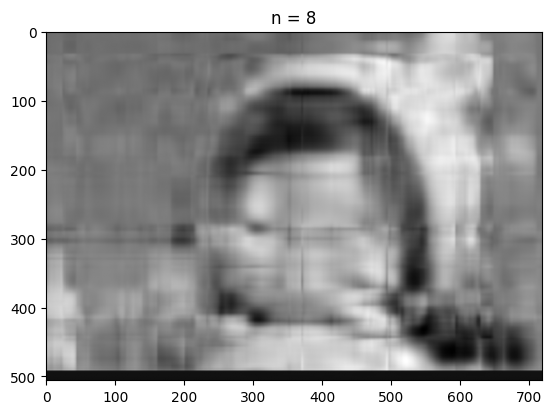

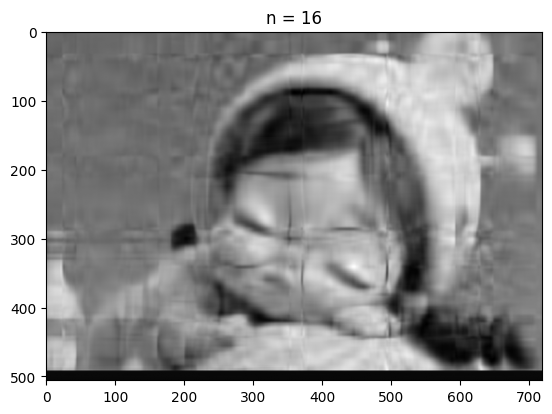

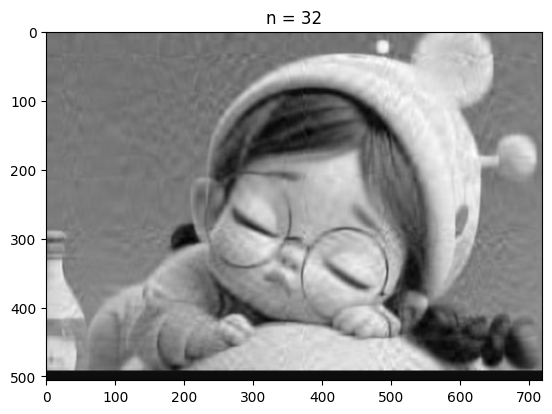

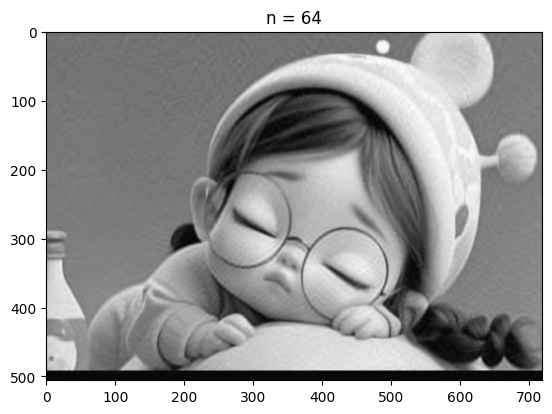

In [118]:
for i in [2, 4, 8, 16, 32, 64]:
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

In [119]:
imgmat.shape

(506, 720)

In [121]:
full_representation = 506*720
full_representation

364320

In [122]:
svd64_rep = 64*506+64+64*720
svd64_rep

78528

In [123]:
svd64_rep/full_representation

0.2155467720685112

# the moore perose pseudoinverse

In [124]:
A

array([[-1,  2],
       [ 3, -2],
       [ 5,  7]])

In [125]:
U,d,VT=np.linalg.svd(A)
U

array([[ 0.12708324,  0.47409506,  0.87125411],
       [ 0.00164602, -0.87847553,  0.47778451],
       [ 0.99189069, -0.0592843 , -0.11241989]])

In [126]:
VT

array([[ 0.55798885,  0.82984845],
       [-0.82984845,  0.55798885]])

In [127]:
d

array([8.66918448, 4.10429538])

In [128]:
D = np.diag(d)
D

array([[8.66918448, 0.        ],
       [0.        , 4.10429538]])

In [130]:
1/8.669

0.11535355865728457

In [129]:
1/4.104

0.24366471734892786

In [131]:
Dinv = np.linalg.inv(D)
Dinv

array([[0.1153511 , 0.        ],
       [0.        , 0.24364718]])

In [132]:
Dplus = np.concatenate((Dinv, np.array([[0, 0]]).T), axis=1)
Dplus

array([[0.1153511 , 0.        , 0.        ],
       [0.        , 0.24364718, 0.        ]])

In [133]:
np.dot(VT.T, np.dot(Dplus, U.T))

array([[-0.08767773,  0.17772512,  0.07582938],
       [ 0.07661927, -0.1192733 ,  0.08688784]])

In [135]:
np.linalg.pinv(A)
# a^+ = vd^+U^T

array([[-0.08767773,  0.17772512,  0.07582938],
       [ 0.07661927, -0.1192733 ,  0.08688784]])

In [136]:
# exercise
A_p = torch.tensor([[-1, 2], [3, -2], [5, 7.]])
A_p

tensor([[-1.,  2.],
        [ 3., -2.],
        [ 5.,  7.]])

In [137]:
torch.pinverse(A_p)

tensor([[-0.0877,  0.1777,  0.0758],
        [ 0.0766, -0.1193,  0.0869]])

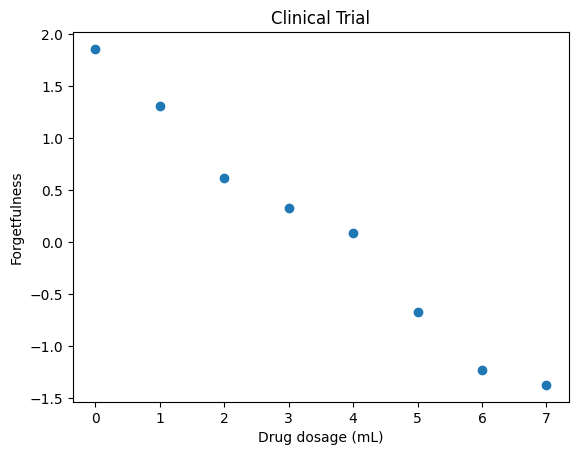

In [138]:
x1 = [0, 1, 2, 3, 4, 5, 6, 7.]
y = [1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37]
title = 'Clinical Trial'
xlabel = 'Drug dosage (mL)'
ylabel = 'Forgetfulness'
fig, ax = plt.subplots()
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
_ = ax.scatter(x1, y)

In [139]:
x0 = np.ones(8)
x0

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [140]:

X = np.concatenate((np.matrix(x0).T, np.matrix(x1).T), axis=1)
X

matrix([[1., 0.],
        [1., 1.],
        [1., 2.],
        [1., 3.],
        [1., 4.],
        [1., 5.],
        [1., 6.],
        [1., 7.]])

In [141]:
w = np.dot(np.linalg.pinv(X), y)
w


matrix([[ 1.76      , -0.46928571]])

In [142]:
b = np.asarray(w).reshape(-1)[0]
b

np.float64(1.7599999999999985)

In [144]:

m = np.asarray(w).reshape(-1)[1]
m

np.float64(-0.4692857142857139)

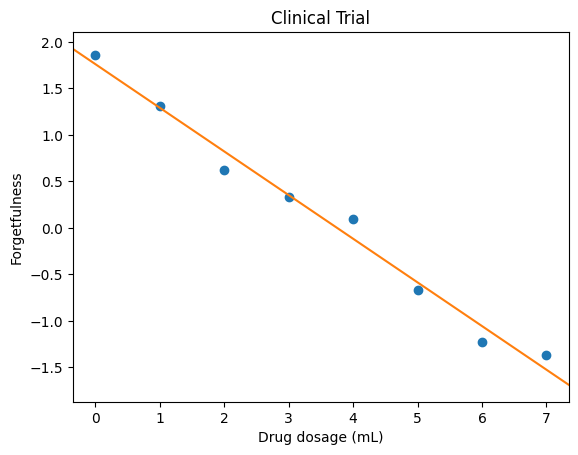

In [145]:
fig, ax = plt.subplots()

plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

ax.scatter(x1, y)

x_min, x_max = ax.get_xlim()
y_at_xmin = m*x_min + b
y_at_xmax = m*x_max + b

ax.set_xlim([x_min, x_max])
_ = ax.plot([x_min, x_max], [y_at_xmin, y_at_xmax], c='C01')

# The Trace Operator

In [146]:
A = np.array([[25, 2], [5, 4]])
A

array([[25,  2],
       [ 5,  4]])

In [147]:

25 + 4

29

In [148]:

np.trace(A)

np.int64(29)

# Principal Component Analysis

In [149]:
from sklearn import datasets
iris = datasets.load_iris()

In [150]:
iris.data.shape

(150, 4)

In [151]:
iris.get("feature_names")

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [152]:

iris.data[0:6,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4]])

In [154]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = pca.fit_transform(iris.data)
X.shape

(150, 2)

In [155]:

X[0:6,:]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045]])

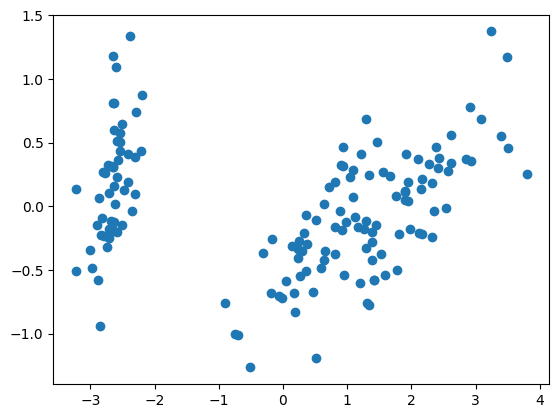

In [156]:
_ = plt.scatter(X[:, 0], X[:, 1])

In [157]:
iris.target.shape

(150,)

In [158]:
iris.target[0:6]

array([0, 0, 0, 0, 0, 0])

In [159]:
unique_elements, counts_elements = np.unique(iris.target, return_counts=True)
np.asarray((unique_elements, counts_elements))

array([[ 0,  1,  2],
       [50, 50, 50]])

In [160]:
list(iris.target_names)

[np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]

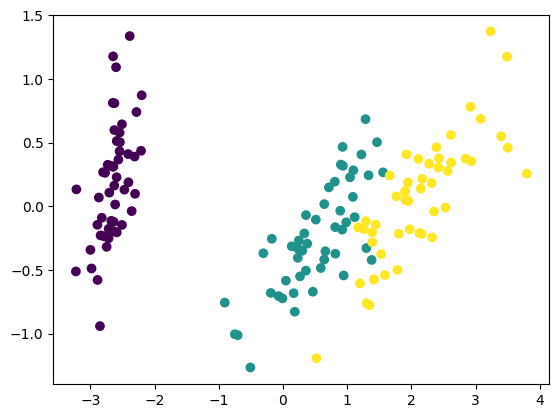

In [161]:

_ = plt.scatter(X[:, 0], X[:, 1], c=iris.target)

In [ ]:
c